# 단일 선형 회귀분석 (Simple Linear Regression)

- 두 변수(종속변수, 독립변수) 사이의 함수적 관계를 기술한느 수학적 방정식을 구하는데 사용
- 독립변수(X)값이 주어질 때 종속변수(y)의 값을 추정하거나 예측하는데 사용
- 서로 상관관계를 갖는 두 변수 사이의 관계를 분석
z

```
    경력, 학력, 초봉 -> 연봉
```

위와 같이 회귀분석을 할때, 종속변수와 독립변수 사이에 상관관계가 중요합니다. 이 관계를 한 눈에 보기 위해서 산포도(Scatter plot)을 그려주겠습니다.


In [22]:
#분석을 위해 필요한 라이브러리를 가져옵니다
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
#sklearn에서 제공하는 데이터셋을 가져오기 위한 모듈입니다.
from sklearn import datasets

#boston의 집 가격 데이터를 불러옵니다.
boston_house_prices = datasets.load_boston()
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [14]:
#숫자로 표시되는 컬럼을 해당 이름에 맞게 매칭시켜주겠습니다.
data_frame.columns = boston_house_prices.feature_names
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#종속변수가 될 Price 컬럼을 추가합니다.
data_frame['Price'] = boston_house_prices.target
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


이제 불러온 데이터를 가지고 산점도를 그려보겠습니다.

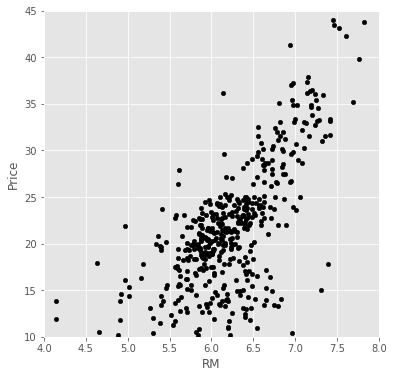

In [30]:
data_frame.plot(kind='scatter', x = 'RM', y = 'Price', figsize = (6,6),
               color = 'black', xlim = (4,8), ylim = (10,45))

### 산점도 (Scatter plot)

- 회귀분석을 할 때 두 변수 사이의 관계를 대략적으로 알아보기 위해 산점도를 그립니다.
- 보통 X축에 독립변수, Y축에 종속변수를 설정합니다
- 두 변수간 관련성 및 예측을 위한 회귀분석을 할 만한 자료인지를 미리 알 수 있습니다.

위 산점도에서는 육안으로도 양의 상관관계를 갖는 변수라는 것을 알 수 있습니다.

## 선형회귀모델  학습

\begin{equation*}
y = ax + b + e
\end{equation*}

<ul style="list-style-type:none;">
    <li><i><b>y</i></b> 는 우리가 예측하고자 하는 값입니다. (종속변수 혹은 반응변수라고도 합니다),</li>
    <li><i><b>x</i></b> 는 예측을 위해 사용하는 값입니다. (독립변수, 설명변수, 예측변수 라고도 합니다.),</li>
<li><i><b>a</i></b>은 기울기를 의미하며, 독립변수인 x의 영향력을 크기와 부호로 나타내주는 회귀계수입니다.</li>
<li><i><b>b</i></b> 는 x값이 변해도 y의 변동에는 영향을 주지않는 회귀계수입니다.</li>
<li><i><b>e</i></b> 는 관측치에 대한 오차항입니다.</li>
</ul>

```
    *오차항 : 독립변수 x의 값이 주어질 때 종속변수 y의 실제값과 예측값의 차이를 말함
```

### 1) 단일 선형회귀모델의 가정

- 하나의 종속변수와 하나의 독립변수를 분석
- 독립변수 X의 각 값에 대한 Y의 확률분포가 존재함
- Y의 확률분포의 평균은 X값이 변함에 따라 일정한 추세를 따라 움직인다.
- 종속변수와 독립변수 간에는 선형 함수 관계가 존재함

### 2) 회귀 계수 추정

- 수집된 데이터에 가장 적절한 회귀직선을 구하는것
- 방법으로는 최소자승법(OLS)이 사용됨

### 3) 최소자승법

- 잔차를 자승(제곱)한 값들의 합이 최소가 되도록 회귀식의 a와 b를 구하는 방법
- 측정값을 기초로 해서 적당한 제곱합을 만들고 그것을 최소로 하는 값을 구하여 측정결과를 처리하는 방법

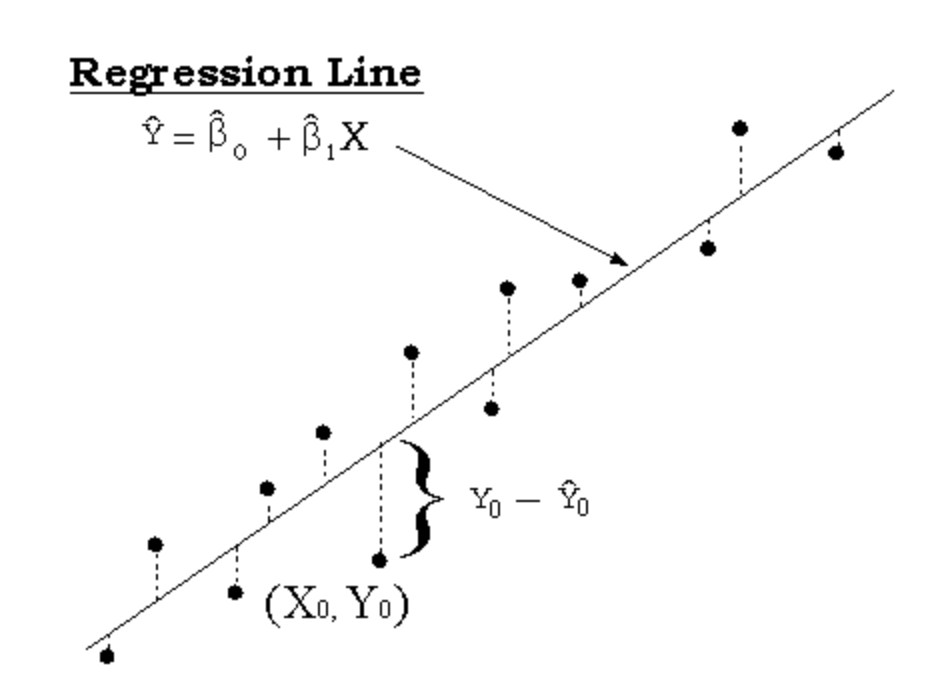

이제 위에서 불러온 Boston 집값 데이터를 통해 회귀분석을 실시해보겠습니다. 독립변수인 **방갯수(RM)** 로 종속변수인 **집값(Price)** 을 예측하는 회귀분석 모델입니다.


In [24]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame['RM']), y = data_frame['Price'])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame['RM']))
print('a value = ', linear_regression.intercept_)
print('b value = ',linear_regression.coef_)

a value =  -34.67062077643857
b value =  [9.10210898]


`linear_model.LinearRegression()`이라는 함수를 통해 선형회귀모델을 만들어 linear_regression라는 변수 안에 저장합니다.
그 다음 `.fit` 함수를 이용해 우리가 넣고자 하는 데이터를 넣고 모델을 학습하게 합니다. 이때 RM 독립변수와 Price 종속변수를 넣었습니다. 또한 X 변수는 무조건 2차원형태여야 하기 때문에 Series 타입인 RM컬럼을 Dataframe화 시켜주었습니다.
그 후 학습된 모델에 RM 데이터를 넣어줌으로써 예측값을 prediction이라는 변수에 넣어줍니다. 이 과정은 실제값(Price)과 예측값(회귀모델에 RM값을 넣어서 나온 price의 예측값들)을 비교하기 위해 만들어줍니다.



## 적합도 검증

### 1) 적합도 검증이란?

- 표본자료를 사용하여 구한 표본회귀식이 종속변수의 값을 어느정도 정확하게 예측할 수 있는가의 정도를 검증
- 두 변수 값들이 표본 회귀선 주위에 몰려있으면 종속변수의 실제값과 예측값 차이인 잔차가 줄어들어 예측의 정확성이 높아짐

### 2) 적합도 검증 방법

- 추정의 표준오차
- 결정계수


### 3) 추정의 표준오차 (Standard Error of Estimate)

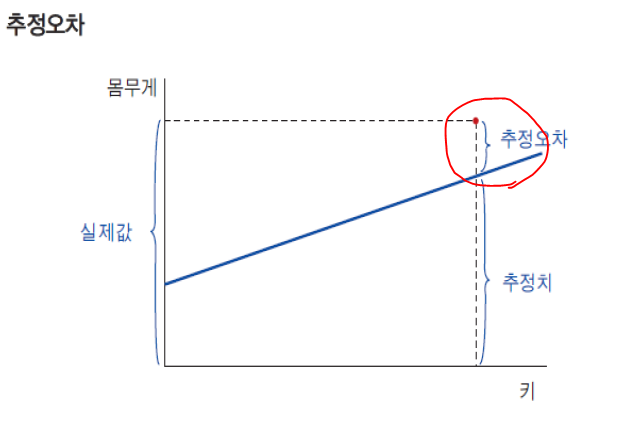

- 값이 클 수록 실제 값들이 회귀선 주위로 널리 흩어지고 작을 수록 실제 값들이 회귀선 주위로 모여들어, 그 회귀선을 이용한 종속변수의 값 예측에 대한 정확도는 높아짐
- 추정의 표준오차와 표준편차의 차이
    - 추정의 표준오차 : 표본들의 실제 값들이 **표본 회귀선** 주위로 흩어진 변동을 측정
    - 표준편차 : 표본들의 실제 값들이 **평균주위**로 흩어진 변동을 측정
    
     

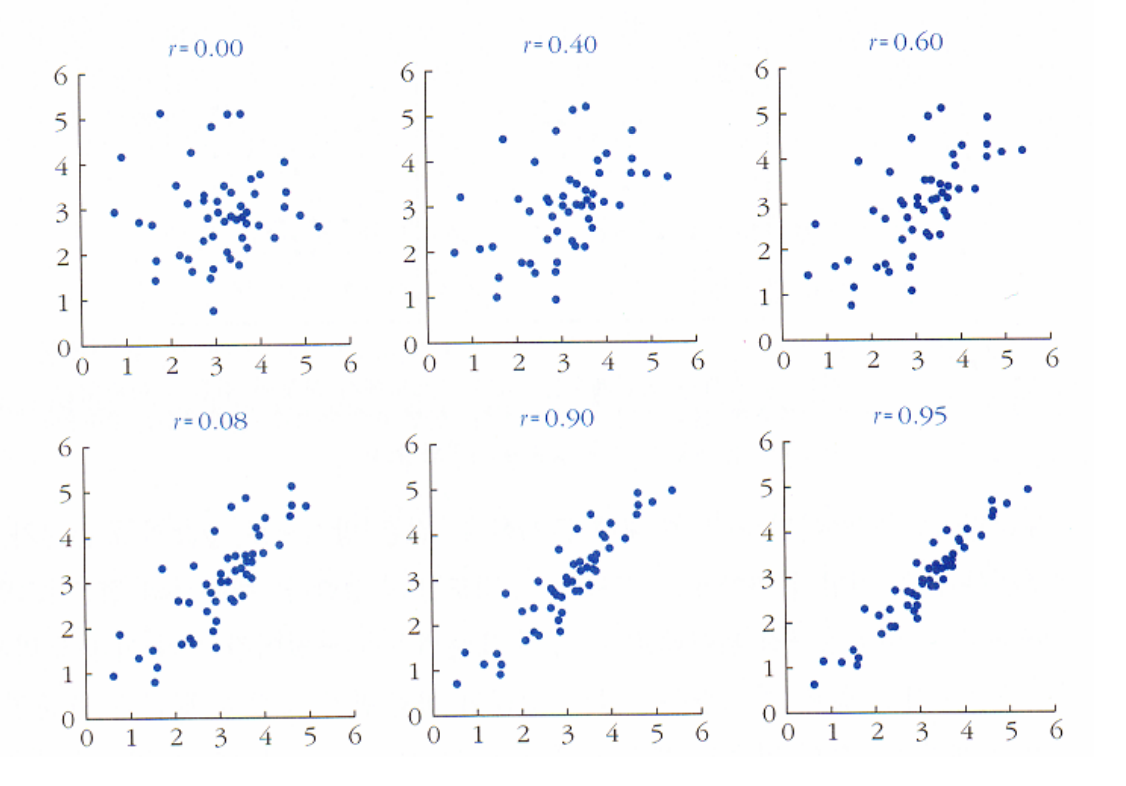



위 사진에서 볼 수 있는 추정오차의 제곱합은 SSE(오차제곱합)이라고도 불립니다. 

### 4) 총변동 (Total Variation)

- 총 제곱합(Sum of Squares Total : SST) = 회귀제곱합(Sum of Squares Regression : SSR) + 오차제곱합(Sum of Squares Error : SSE)
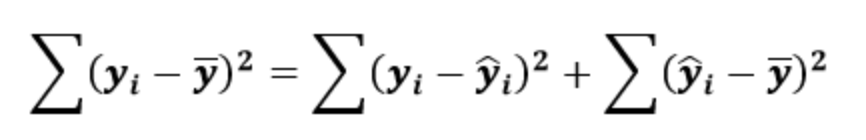

- SST : **실제값** y들이 이들의 **평균** y로 부터 흩어진 정도
- SSR : **예측치**와 실제값 y들의 **평균 y**의 차이의 제곱합
- SSE : 예측치와 실제값 차이의 제곱의 합
- 이렇게 구한 총변동은 결정계수를 구하기 위해 쓰인다.

### 5) 결정계수 (Coefficient of Determination)

\begin{equation*}
R^2 = SSR/SST = 1 - SSE/SST
\end{equation*}

- 결정계수는 0부터 1까지의 값을 가짐
- 표본회귀선이 모든 자료에 완전히 적합하면 SSE = 0, 즉 R^2 = 1 이됨
- R^2의 값이 1에 가까울수록 표본회귀선으로 종속변수의 실제 값 y를 예측하는데 정확성이 높음
- 즉 X가 Y값을 결정계수의 확률만큼 결정한다.

In [25]:
residuals = data_frame['Price'] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

우선 잔차를 구해주었습니다. **실제값 "Price"** 에서 _prediction에 저장된 예측값 y_ 를 빼주어 residuals 변수에 저장했습니다. 이 값들이 잔차들의 집합입니다. 

In [28]:
SSE = (residuals ** 2).sum()
SST = ((data_frame['Price'] - data_frame['Price'].mean()) ** 2).sum()
R_squared = 1 - (SSE/SST)

print('R_squared = ', R_squared)

R_squared =  0.4835254559913341


위에서 알아봤던 총변동 값을 통해 결정계수를 구하는 공식으로 R-sqaured 값을 구했습니다. 출력된 결정계수 **48.35%** 로 x값이 y값에 영향을 주는 것을 확인했습니다. 낮은 수치인것 같지만 13개의 독립변수 중 1개인 것을 감안하면 매우 높은 수치인 것을 확인할 수 있습니다. 실제로 사회과학에서는 결정계수 0.4면 어느정도 높은수치로 받아들이고 있습니다.

## 플롯으로 표현

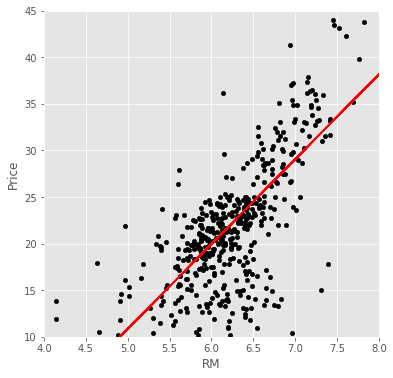

In [29]:
data_frame.plot(kind = 'scatter', x = 'RM', y = 'Price',
               figsize = (6,6), color = 'black', xlim = (4,8), ylim = (10,45))

#regression line
plt.plot(data_frame['RM'], prediction, color = 'red')

예측한 값(prediction)들을 통해 산점도에 선형회귀직선을 그렸습니다. 

## 성능 평가

### 1) 잔차 (Residuals)

- 회귀분석 모델의 예측값과 실제값 사이의 차이

### 2) Mean Squared Error (MSE)

- 평균제곱오차
- 회귀선과 모델 예측값 사이의 오차를 사용
- 오차를 제곱한 값들의 평균

### 3) Root Mean Squared Error (RMSE)

- 평균 제곱근 오차, MSE에서 루트를 적용한값


In [32]:
from sklearn.metrics import mean_squared_error

sklearn패키지에서 제공하는 MSE를 구하는 모듈인 `mean_squared_error`를 가져옵니다.

In [34]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame['RM']), y = data_frame['Price']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame['Price']))
print('RMSE = ', mean_squared_error(prediction, data_frame['Price'])**0.5)

score =  0.4835254559913343
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561


score는 `.score`함수로 회귀분석 모델의 성능을 평가한 수치입니다. 즉 결정계수(R-Squared)입니다.  
두번째 줄은 `mean_squared_error`모듈을 이용해 평균제곱오차 즉 MSE를 구해주었습니다.   
세번째 줄은 위에서 구한 MSE값에 제곱근을 해준 값, 즉 RMSE 값입니다.  